In [1]:
import os
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import matplotlib.pyplot as plt
import numpy as np
import time
import math
random.seed(5)


In [2]:
def create_dataset(math_function,x_range,test_x_range,n,test_n,noise_param):
    train_set = []
    test_set= []
    for i in range(n//2):
        x = random.uniform(a=x_range[0],b=x_range[1]//2) 
        y = -math_function(x)+ random.normalvariate(mu=noise_param[0],sigma=noise_param[1])
        train_set.append([x,y])
    for i in range(n//2):
        x = random.uniform(a=x_range[1]//2,b=x_range[1]) 
        y = -math_function(x)+ random.normalvariate(mu=noise_param[0],sigma=noise_param[1]*50)
        train_set.append([x,y])
    for i in range(test_n):
        x = random.uniform(a=test_x_range[0],b=test_x_range[1])
        y = -math_function(x)+ random.normalvariate(mu=noise_param[0],sigma=noise_param[1])
        test_set.append([x,y])
    train_set.sort(key=lambda x:x[0])
    test_set.sort(key=lambda x:x[0])
    return  np.array(train_set), np.array(test_set)

In [3]:
n = 200
train_set,test_set = create_dataset(math.cos,[-5,5],[-10,10],n,int(n*2),[0,0])

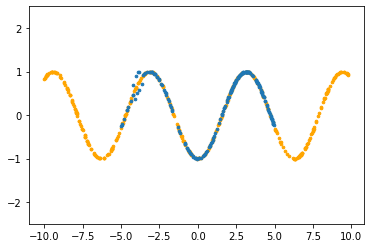

In [4]:
def show_data(train_set,test_set,thrid_set=None,var=None):
    
    plt.scatter(test_set[:,0],test_set[:,1],c="orange",s=7)
    plt.scatter(train_set[:,0],train_set[:,1],s=7)
    if thrid_set is not None:
        if var is not None:
            plt.plot(thrid_set[:,0],thrid_set[:,1],c="red")
            plt.fill_between(thrid_set[:,0],thrid_set[:,1]-var,thrid_set[:,1]+var,zorder = 0)
        else:
            plt.plot(thrid_set[:,0],thrid_set[:,1],c="red")
    plt.ylim((-2.5,2.5))
    plt.show()


train_set[10,1]+= 0.2
train_set[11,1]-= 0.2
train_set[12,1]+= 0.25
train_set[13,1]-= 0.2
train_set[14,1]+= 0.25
train_set[15,1]-= 0.2
train_set[16,1]+= 0.2
train_set[17,1]-= 0.15

# train_set[-1,1]+= 0.5
# train_set[-2,1]-= 0.5
show_data(train_set,test_set)

In [5]:
class NN(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, output_size=1,p=0.9):
        super(NN, self).__init__()
        self.p = p
        self.fc1 = nn.Sequential(nn.Linear(input_size, hidden_size),
                                 nn.Dropout(p= 1-p),
                                 nn.ReLU(),
                                 nn.Linear(hidden_size, hidden_size),
                                 nn.Dropout(p= 1-p),
                                 nn.ReLU(),
                                 nn.Linear(hidden_size, hidden_size),
                                 nn.Dropout(p= 1-p),
                                 nn.ReLU(),
                                 nn.Linear(hidden_size, hidden_size),
                                 nn.Dropout(p= 1-p),
                                 nn.ReLU(),
                                 nn.Linear(hidden_size, hidden_size),
                                 nn.Dropout(p= 1-p),
                                 nn.ReLU(),
                                 nn.Linear(hidden_size, hidden_size),
                                 nn.Dropout(p= 1-p),
                                 nn.ReLU(),
                                 nn.Linear(hidden_size, hidden_size),
                                 nn.Dropout(p= 1-p),
                                 nn.ReLU())
        
        self.out = nn.Linear(hidden_size, output_size)
        self.var_out = nn.Sequential(nn.Linear(hidden_size, 1))
    def forward(self, x):
        features = self.fc1(x)
        output = self.out(features)
        log_var = self.var_out(features)
        return output,log_var

net = NN()
print(net)
net.train()

NN(
  (fc1): Sequential(
    (0): Linear(in_features=1, out_features=64, bias=True)
    (1): Dropout(p=0.09999999999999998, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Dropout(p=0.09999999999999998, inplace=False)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=64, bias=True)
    (7): Dropout(p=0.09999999999999998, inplace=False)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=64, bias=True)
    (10): Dropout(p=0.09999999999999998, inplace=False)
    (11): ReLU()
    (12): Linear(in_features=64, out_features=64, bias=True)
    (13): Dropout(p=0.09999999999999998, inplace=False)
    (14): ReLU()
    (15): Linear(in_features=64, out_features=64, bias=True)
    (16): Dropout(p=0.09999999999999998, inplace=False)
    (17): ReLU()
    (18): Linear(in_features=64, out_features=64, bias=True)
    (19): Dropout(p=0.09999999999999998, inplace=False)
    (20): ReLU()
  )
  (out): Linear(in_features=64, out_features

NN(
  (fc1): Sequential(
    (0): Linear(in_features=1, out_features=64, bias=True)
    (1): Dropout(p=0.09999999999999998, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Dropout(p=0.09999999999999998, inplace=False)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=64, bias=True)
    (7): Dropout(p=0.09999999999999998, inplace=False)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=64, bias=True)
    (10): Dropout(p=0.09999999999999998, inplace=False)
    (11): ReLU()
    (12): Linear(in_features=64, out_features=64, bias=True)
    (13): Dropout(p=0.09999999999999998, inplace=False)
    (14): ReLU()
    (15): Linear(in_features=64, out_features=64, bias=True)
    (16): Dropout(p=0.09999999999999998, inplace=False)
    (17): ReLU()
    (18): Linear(in_features=64, out_features=64, bias=True)
    (19): Dropout(p=0.09999999999999998, inplace=False)
    (20): ReLU()
  )
  (out): Linear(in_features=64, out_features

In [6]:
def MC_samples(ds):
    T = 64
    probs = []
    aleatoric_uncertainty = []
    l = 10
    for i,x in enumerate(ds):
        if type(x) is not float:
            x = x[0]
        x = torch.tensor([x])
        probs.append([])
        aleatoric_uncertainty.append([])
        for _ in range(T):
            output,log_var = net(x)
            output = output.item();log_var = log_var.item()
            probs[i].append(output)
            aleatoric_uncertainty[i].append(log_var)
    probs = np.array(probs)
    aleatoric_uncertainty = np.array(aleatoric_uncertainty)
    means = probs.mean(axis=1)
    aleatoric_uncertainty_means = aleatoric_uncertainty.mean(axis=1)
    variances = np.var(probs, axis=1)
    tau = l**2 * ( net.p) / (2 * len(train_set) * weight_decay)
    variances += tau**-1
    return means,aleatoric_uncertainty_means,variances

In [7]:
class Aleatoric_loss(nn.Module):
    def __init__(self):
        super(Aleatoric_loss, self).__init__()

    def forward(self, output, gt,log_variance):
        loss = torch.sum(0.5 * (torch.exp(-1*log_variance)) *(gt - output)**2
                         + 0.5 * log_variance)
        return loss


In [8]:
weight_decay = 0.0001
optimizer = optim.Adam(net.parameters(), lr=0.00065,weight_decay=weight_decay)
criterion = Aleatoric_loss()
n_epoch = 1000
test_mean = []
test_a = []
test_v = []

In [9]:
for epoch in range(n_epoch):
    train_error = 0
    for data in train_set:
        net.zero_grad()
        x,y = data
        x = torch.tensor([x])
        y = torch.tensor([y])
        output,log_var = net(x)
        errD_real = criterion(output, y,log_var)
        errD_real.backward()
        optimizer.step()
        train_error += errD_real
    train_error = train_error/len(train_set)
    if epoch % 5 == 0:
        print("Epoch =",epoch)
        print("train_error =",errD_real.item())
    
    

Epoch = 0
train_error = -0.7084238529205322
Epoch = 5
train_error = -0.22215604782104492
Epoch = 10
train_error = -0.08038496971130371
Epoch = 15
train_error = 0.20286667346954346
Epoch = 20
train_error = 1.253202199935913
Epoch = 25
train_error = -1.0435785055160522
Epoch = 30
train_error = -1.1529293060302734
Epoch = 35
train_error = 0.3950014114379883
Epoch = 40
train_error = -1.1948895454406738
Epoch = 45
train_error = -0.5859991908073425
Epoch = 50
train_error = 0.47753292322158813
Epoch = 55
train_error = -1.063215970993042
Epoch = 60
train_error = -1.385952353477478
Epoch = 65
train_error = -1.4082186222076416
Epoch = 70
train_error = -1.2620078325271606
Epoch = 75
train_error = -0.7642021775245667
Epoch = 80
train_error = -1.658997654914856
Epoch = 85
train_error = -1.290021538734436
Epoch = 90
train_error = -1.3371671438217163
Epoch = 95
train_error = -1.375838041305542
Epoch = 100
train_error = -1.2598079442977905
Epoch = 105
train_error = -1.675203561782837
Epoch = 110
train

train_error = -1.6637823581695557
Epoch = 900
train_error = -1.866487741470337
Epoch = 905
train_error = 8.861869812011719
Epoch = 910
train_error = -2.07594633102417
Epoch = 915
train_error = -1.6019737720489502
Epoch = 920
train_error = -1.5402508974075317
Epoch = 925
train_error = -1.7688331604003906
Epoch = 930
train_error = -1.4270894527435303
Epoch = 935
train_error = -1.895193099975586
Epoch = 940
train_error = -1.3587627410888672
Epoch = 945
train_error = -0.217634916305542
Epoch = 950
train_error = -1.0049718618392944
Epoch = 955
train_error = -1.6577180624008179
Epoch = 960
train_error = -2.1196799278259277
Epoch = 965
train_error = -1.9935334920883179
Epoch = 970
train_error = -1.44237220287323
Epoch = 975
train_error = -1.746069312095642
Epoch = 980
train_error = -1.828224539756775
Epoch = 985
train_error = -2.1072146892547607
Epoch = 990
train_error = -2.396153688430786
Epoch = 995
train_error = -0.6174025535583496


In [10]:
result = []
means,aleatoric_uncertainty_means,variances = MC_samples(test_set)
for i,data in enumerate(test_set):
    x = data[0]
    y = means[i]
    result.append([x,y])

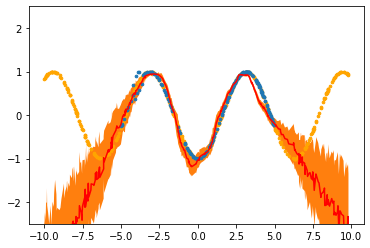

In [11]:
show_data(train_set,test_set,np.array(result),np.sqrt(variances))

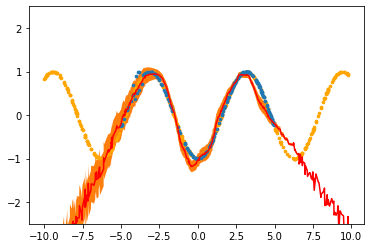

In [12]:
show_data(train_set,test_set,np.array(result),np.sqrt(np.exp(aleatoric_uncertainty_means)))

In [13]:
forward_x = [i/10 for i in range(-750,750)]
means,aleatoric_uncertainty_means,variances = MC_samples(forward_x)

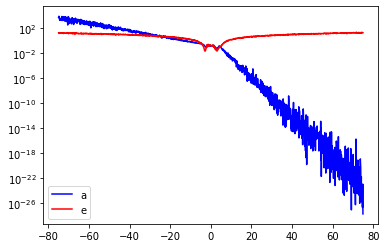

5734.206020022818

In [14]:
%matplotlib inline
plt.plot(forward_x,np.sqrt(np.exp(aleatoric_uncertainty_means)),label='a',color='b')
plt.plot(forward_x,np.sqrt(variances),label='e',color='r')
plt.legend()
plt.yscale('log')
plt.show()
np.sqrt(np.exp(aleatoric_uncertainty_means[0]))